# House Price Prediction Project

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
df = pd.read_csv('./Bengaluru_House_Data.csv')
df.head(10)


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


In [3]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [4]:
df.shape

(13320, 9)

In [5]:
df2 = df.drop(['area_type', 'availability', 'society','balcony'], axis='columns')
df2.head(5)

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [6]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [7]:
df3= df2.dropna()

In [8]:
df3.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [9]:
df3.shape

(13246, 5)

In [10]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [11]:
df3['bedrooms'] = df3['size'].apply(lambda x : float(x.split(' ')[0]))
df3.head()

C:\Users\JTRICKZZ\AppData\Local\Temp\ipykernel_4124\3819635540.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bedrooms'] = df3['size'].apply(lambda x : float(x.split(' ')[0]))


,location,size,total_sqft,bath,price,bedrooms
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2.0
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4.0
2,Uttarahalli,3 BHK,1440,2.0,62.00,3.0
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3.0
4,Kothanur,2 BHK,1200,2.0,51.00,2.0


In [12]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [13]:
def is_float(x) :
    try:
        float(x)
    except:
        return False
    return True

In [14]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bedrooms
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4.0
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4.0
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2.0
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2.0
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2.0
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1.0
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2.0
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9.0
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2.0
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4.0


In [15]:
def convert_rng_num (x):
    values = x.split('-')
    if len(values) == 2:
        return (float(values[0]) + float(values[1])) / 2
    try:
        return float(x)
    except:
        return None
        

In [16]:
df4 =  df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert_rng_num)
df4 = df4[df4['total_sqft'].notnull()]
df4.head()

,location,size,total_sqft,bath,price,bedrooms
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2.0
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4.0
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3.0
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3.0
4,Kothanur,2 BHK,1200.0,2.0,51.00,2.0


In [17]:
df4['total_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [18]:
df4.shape

(13200, 6)

In [19]:
df4.loc[123]

location      Shampura
size             4 BHK
total_sqft      2650.0
bath               4.0
price            150.0
bedrooms           4.0
Name: 123, dtype: object

### Feature Engineering

In [20]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bedrooms,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2.0,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4.0,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3.0,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3.0,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2.0,4250.000000


In [21]:
len(df5.location.unique())

1298

In [22]:
df5.location = df5.location.apply(lambda x: x.strip())
location_stats = df5['location'].value_counts(ascending=False)
location_stats

Whitefield                   533
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               264
Thanisandra                  235
                            ... 
Rajanna Layout                 1
Subramanyanagar                1
Lakshmipura Vidyaanyapura      1
Malur Hosur Road               1
Abshot Layout                  1
Name: location, Length: 1287, dtype: int64

In [23]:
len(location_stats)

1287

In [24]:
len(location_stats[location_stats > 10])

240

In [25]:
len(location_stats[location_stats <= 10])

1047

### Dimensionality Reduction

In [26]:
location_stats_less_than10 = location_stats[location_stats <= 10]
location_stats_less_than10

BTM 1st Stage                10
Gunjur Palya                 10
Nagappa Reddy Layout         10
Sector 1 HSR Layout          10
Thyagaraja Nagar             10
                             ..
Rajanna Layout                1
Subramanyanagar               1
Lakshmipura Vidyaanyapura     1
Malur Hosur Road              1
Abshot Layout                 1
Name: location, Length: 1047, dtype: int64

In [27]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than10 else x)
len(df5.location.unique())

241

In [28]:
df5.head(10)

,location,size,total_sqft,bath,price,bedrooms,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2.0,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4.0,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3.0,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3.0,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2.0,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2.0,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4.0,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4.0,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3.0,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6.0,36274.509804


### Outlier Removel

In [29]:
df5[df5.total_sqft / df5.bedrooms < 300].head(10)

,location,size,total_sqft,bath,price,bedrooms,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6.0,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8.0,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6.0,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8.0,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3.0,20000.000000
78,Kaval Byrasandra,2 BHK,460.0,1.0,22.0,2.0,4782.608696
89,Rajaji Nagar,6 Bedroom,710.0,6.0,160.0,6.0,22535.211268
119,Hennur Road,2 Bedroom,276.0,3.0,23.0,2.0,8333.333333
129,Vishwapriya Layout,7 Bedroom,950.0,7.0,115.0,7.0,12105.263158
149,other,6 Bedroom,1034.0,5.0,185.0,6.0,17891.682785


In [30]:
df5.shape

(13200, 7)

In [31]:
df6 = df5[~(df5.total_sqft / df5.bedrooms < 300)]
df6.shape

(12456, 7)

In [32]:
df6.describe()

,total_sqft,bath,price,bedrooms,price_per_sqft
count,12456.000000,12456.000000,12456.000000,12456.000000,12456.000000
mean,1590.189927,2.562781,111.187960,2.649004,6308.502826
std,1260.404795,1.080275,152.203367,0.976046,4168.127339
min,300.000000,1.000000,9.000000,1.000000,267.829813
25%,1115.000000,2.000000,49.000000,2.000000,4210.526316
50%,1300.000000,2.000000,70.000000,3.000000,5294.117647
75%,1700.000000,3.000000,115.000000,3.000000,6916.666667
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235


In [33]:
def remove_outliner(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        sd = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-sd)) & (subdf.price_per_sqft<=(m+sd))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

df7 = remove_outliner(df6)
df7.shape

(10242, 7)

Text(0, 0.5, 'Count')

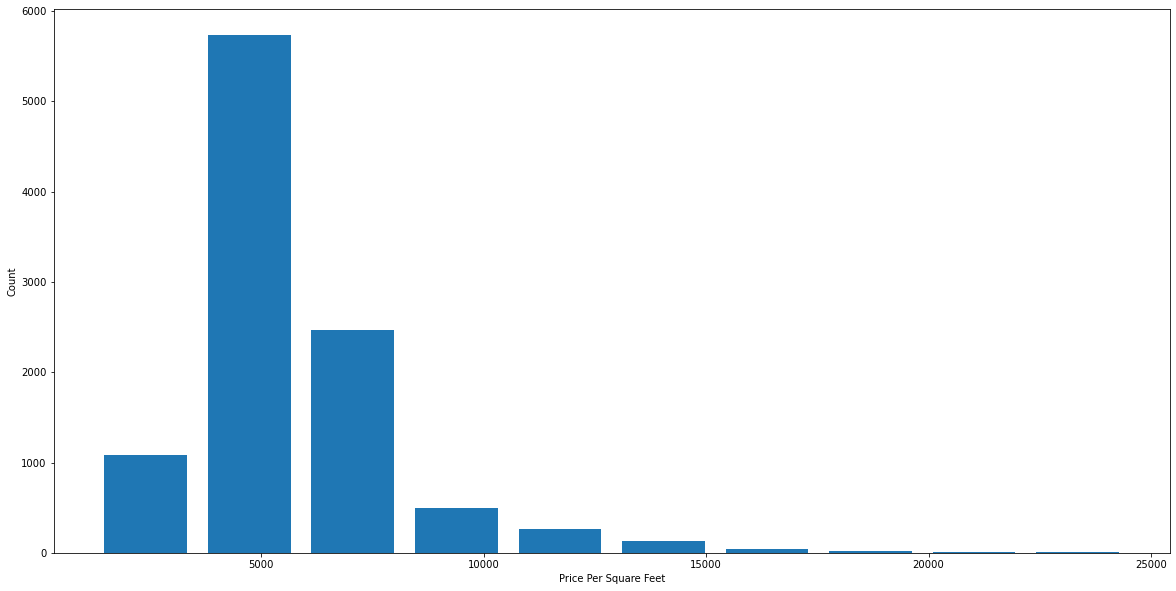

In [34]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df7.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

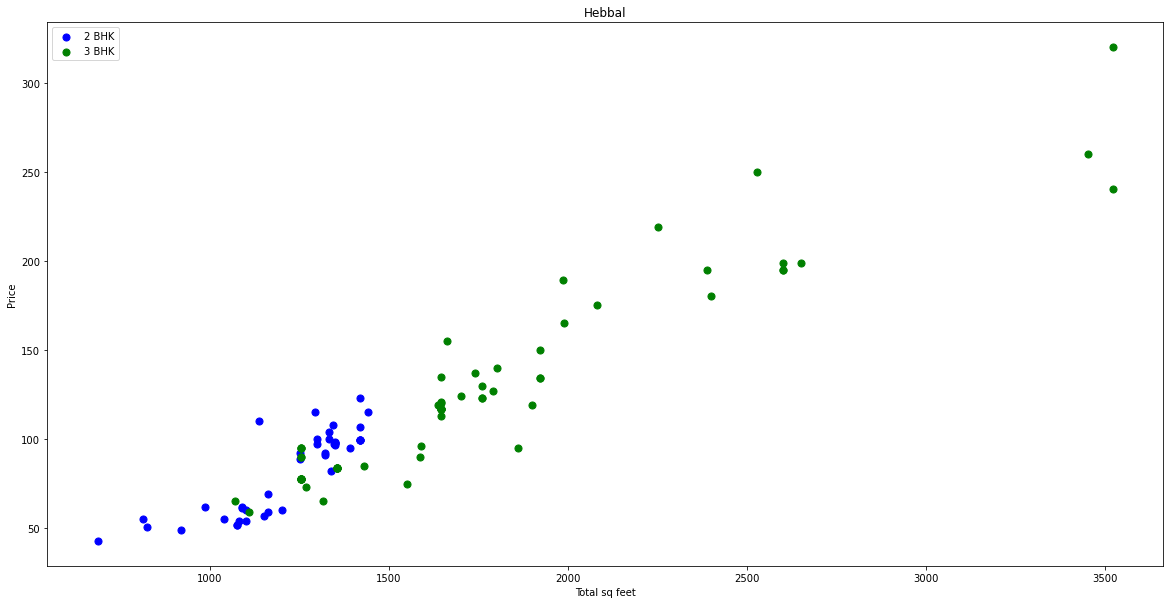

In [35]:
def plot_scatter(df, location):
    bhk2 = df[(df['location'] ==location) & (df['bedrooms'] == 2)] 
    bhk3 = df[(df['location'] ==location) & (df['bedrooms'] == 3)]
    matplotlib.rcParams["figure.figsize"] = (20,10)
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, color='green', label='3 BHK', s=50)
    plt.xlabel("Total sq feet")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()

plot_scatter(df7,'Hebbal')


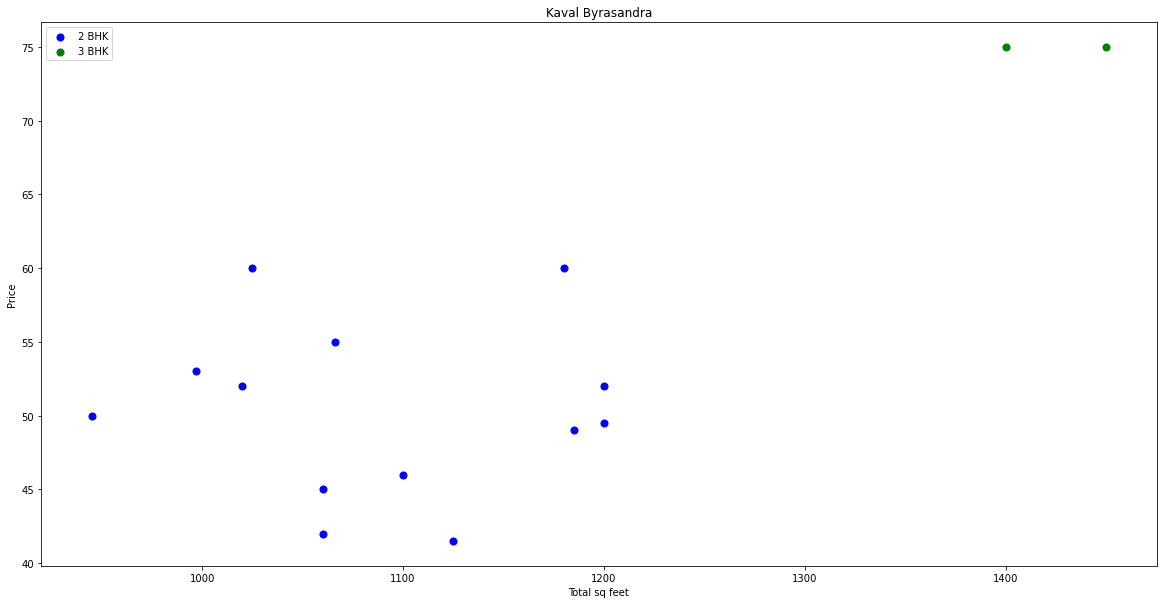

In [36]:
plot_scatter(df7, 'Kaval Byrasandra')

In [37]:
from itertools import groupby


def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location , location_df in df.groupby('location'):
        global bhk_stats
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bedrooms'):
            bhk_stats[bhk] = {
                "mean": np.mean(bhk_df.price_per_sqft),
                "std": np.std(bhk_df.price_per_sqft),
                "count": bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bedrooms'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

df8 = remove_bhk_outliers(df7)
df8.shape

(7317, 7)

In [38]:
bhk_stats

{1.0: {'mean': 5375.333572085832, 'std': 2429.307279315399, 'count': 133},
 2.0: {'mean': 5294.561668049487, 'std': 1980.2027996343368, 'count': 985},
 3.0: {'mean': 6304.571454776566, 'std': 2550.903992727827, 'count': 859},
 4.0: {'mean': 8334.159251776742, 'std': 2892.9656869519777, 'count': 224},
 5.0: {'mean': 7189.330916894648, 'std': 3343.9378691329457, 'count': 42},
 6.0: {'mean': 6975.562368913401, 'std': 3043.3045406755605, 'count': 34},
 7.0: {'mean': 4416.04514952076, 'std': 1880.8047469934816, 'count': 12},
 8.0: {'mean': 5384.347002204145, 'std': 1946.6298824910634, 'count': 7},
 9.0: {'mean': 5530.842391304348, 'std': 3234.230886145459, 'count': 4},
 10.0: {'mean': 9005.681818181818, 'std': 4630.681818181818, 'count': 2},
 11.0: {'mean': 4850.0, 'std': 2350.0, 'count': 2},
 13.0: {'mean': 5069.124423963133, 'std': 0.0, 'count': 1},
 16.0: {'mean': 5500.0, 'std': 0.0, 'count': 1}}

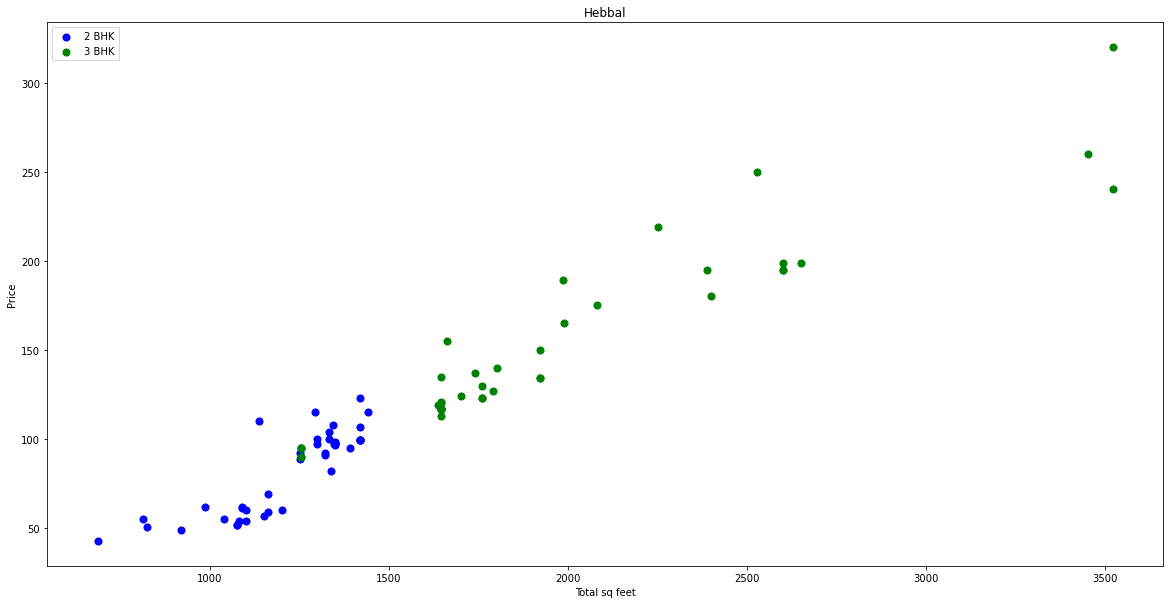

In [39]:
plot_scatter(df8,'Hebbal')

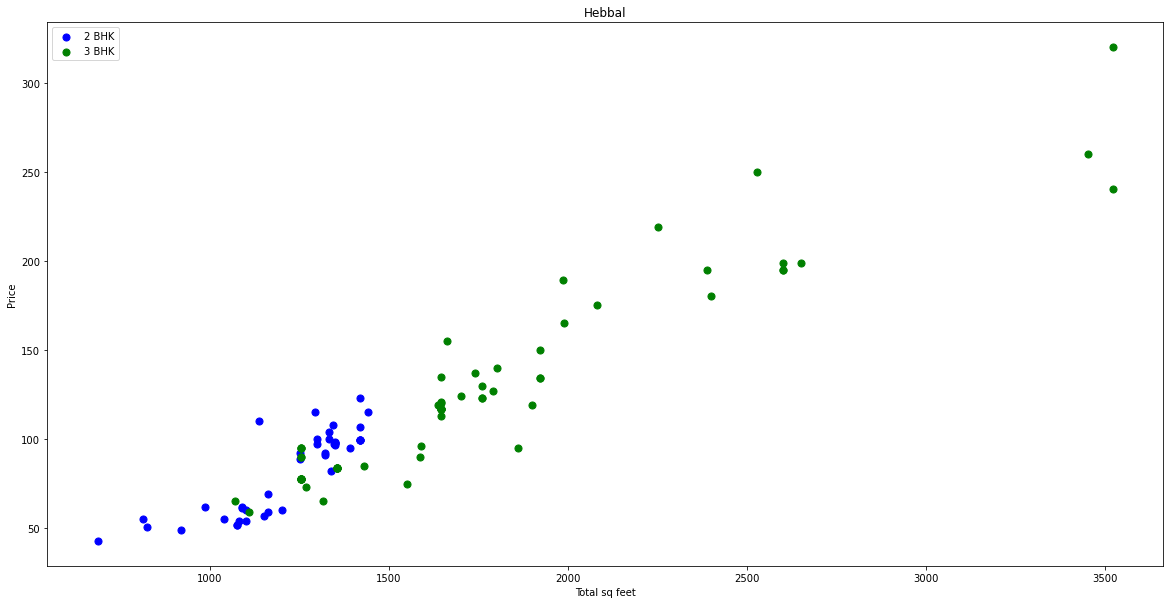

In [40]:
plot_scatter(df7,'Hebbal')

In [41]:
df8.head()

,location,size,total_sqft,bath,price,bedrooms,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4.0,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3.0,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3.0,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3.0,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2.0,11983.805668


In [42]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'Count')

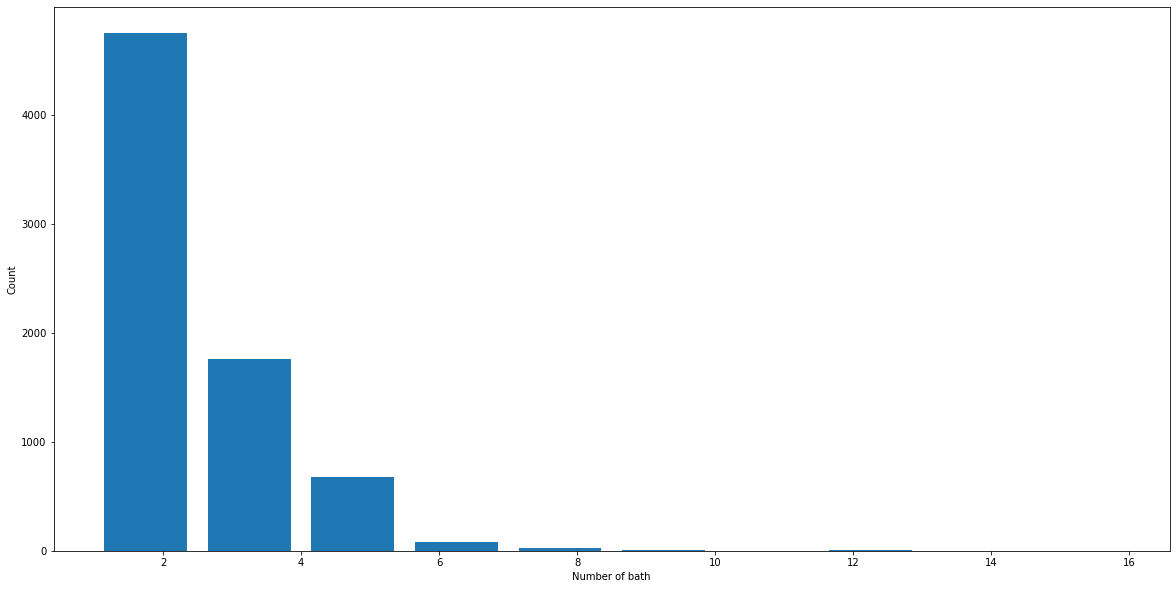

In [44]:
plt.hist(df8.bath, rwidth=0.8)
plt.xlabel("Number of bath")
plt.ylabel("Count")

In [45]:
df8[df8.bath > 10]

,location,size,total_sqft,bath,price,bedrooms,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10.0,4000.000000
8483,other,10 BHK,12000.0,12.0,525.0,10.0,4375.000000
8572,other,16 BHK,10000.0,16.0,550.0,16.0,5500.000000
9306,other,11 BHK,6000.0,12.0,150.0,11.0,2500.000000
9637,other,13 BHK,5425.0,13.0,275.0,13.0,5069.124424


In [47]:
df8[df8.bath > df8.bedrooms+2]

,location,size,total_sqft,bath,price,bedrooms,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4.0,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4.0,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3.0,6423.034330
8408,other,6 BHK,11338.0,9.0,1000.0,6.0,8819.897689


In [49]:
df9 = df8[df8.bath < df8.bedrooms+2]
df9.shape

(7239, 7)

In [50]:
df9.head()

,location,size,total_sqft,bath,price,bedrooms,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4.0,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3.0,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3.0,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3.0,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2.0,11983.805668


In [51]:
df10 = df9.drop(['size', 'price_per_sqft'], axis='columns')
df10.head()

,location,total_sqft,bath,price,bedrooms
0,1st Block Jayanagar,2850.0,4.0,428.0,4.0
1,1st Block Jayanagar,1630.0,3.0,194.0,3.0
2,1st Block Jayanagar,1875.0,2.0,235.0,3.0
3,1st Block Jayanagar,1200.0,2.0,130.0,3.0
4,1st Block Jayanagar,1235.0,2.0,148.0,2.0


### One hot Encoding

In [52]:
dummies = pd.get_dummies(df10.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
df11 = pd.concat([df10, dummies.drop('other', axis='columns')], axis='columns')
df11.head()

,location,total_sqft,bath,price,bedrooms,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
df12 = df11.drop('location', axis='columns')
df12.head()

,total_sqft,bath,price,bedrooms,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Building Model 

In [57]:
df12.shape

(7239, 244)

In [58]:
X = df12.drop('price', axis='columns')
X.head()

,total_sqft,bath,bedrooms,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
y = df12.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

### Using Linear Regression

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [62]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [74]:
lr_model = LinearRegression()

In [75]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [76]:
lr_model.score(X_test, y_test)

0.8629132245229525

### Using K-Folds to measure accuracy of Linear Regression

In [67]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.82702546, 0.86027005, 0.85322178, 0.8436466 , 0.85481502])

### Finding Best Model

In [69]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor


def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['squared_error','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    score = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv = cv, return_train_score= False)
        gs.fit(X,y)
        score.append({
            'model': algo_name,
            'best_score':gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(score,columns=['model','best_score','best_params'])



find_best_model_using_gridsearchcv(X, y)




c:\Users\JTRICKZZ\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
c:\Users\JTRICKZZ\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

m

,model,best_score,best_params
0,linear_regression,0.847796,{'normalize': False}
1,lasso,0.726764,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.716209,"{'criterion': 'squared_error', 'splitter': 'be..."


In [70]:
X.columns

Index(['total_sqft', 'bath', 'bedrooms', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=243)

In [73]:
location = '1st Phase JP Nagar'
np.where(X.columns == location)[0][0]

4

## Testing The New Model

In [77]:
def predict_price(location, sqft, bath, bhk):
    loc_index = np.where(X.columns == location)[0][0]

    x= np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1
    return lr_model.predict([x])[0]

In [78]:
predict_price('1st Phase JP Nagar', 1000, 2, 2)

c:\Users\JTRICKZZ\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83.86570258333366

In [79]:
predict_price('1st Phase JP Nagar', 1000, 3, 3)

c:\Users\JTRICKZZ\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


86.08062285008035

In [80]:
predict_price('Indira Nagar',1000, 2, 2)

c:\Users\JTRICKZZ\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


193.31197733179067

### Exporting Model

In [81]:
import pickle
with open('banglore_home_price_model', 'wb') as f:
    pickle.dump(lr_model,f)

In [82]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}

with open('Columns.json', 'w') as f:
    f.write(json.dumps(columns))